In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import statistics
import seaborn as sns
import sklearn as sk
from sklearn import ensemble
from datetime import datetime
import scipy.stats as stats

In [2]:
# Mission 1 -
# faire du nettoyage
# voir pour faire des choix sur le traitement 
# des valeurs manquantes ou aberrantes

In [3]:
clients = pd.read_csv("clients.csv")
clients

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


In [4]:
clients.info()
# this df seems clear with no null values (8623/8623)
# like the others df, by the way

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [5]:
# check duplicates (here, nothing ...)
clients = clients.drop_duplicates()
len(clients)

8623

In [6]:
clients.isnull().sum().sort_values(ascending = False)/len(clients)

client_id    0.0
sex          0.0
birth        0.0
dtype: float64

In [7]:
produits = pd.read_csv("produits.csv")
produits

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


In [8]:
produits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [9]:
produits = produits.drop_duplicates()
len(produits)

3287

In [10]:
produits.isnull().sum().sort_values(ascending = False)/len(produits)

id_prod    0.0
price      0.0
categ      0.0
dtype: float64

In [11]:
produits['price'].values

array([19.99,  5.13, 17.99, ..., 11.22, 38.56, 25.16])

<AxesSubplot:>

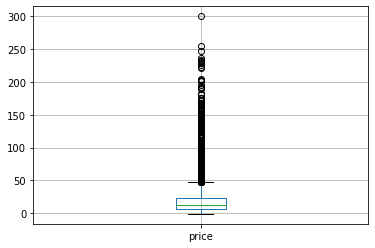

In [12]:
produits[['price']].boxplot()

In [13]:
produits['price'].min()

-1.0

In [14]:
produits['price'].max()
# il peut s'agir d'un livre très cher
# mais ce n'est pas l'extrême le plus aberrant ici

300.0

In [15]:
neg = produits[produits['price'].between(-1, 0)]
neg
# delete the values because a price can't be negative

,id_prod,price,categ
731,T_0,-1.0,0


In [16]:
new_produits = produits.drop([produits.index[731]])
new_produits

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


In [17]:
ventes = pd.read_csv("ventes.csv")
ventes

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242
...,...,...,...,...
337011,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454
337012,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268
337013,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137
337014,2_227,2021-10-30 16:50:15.997750,s_112349,c_5


In [18]:
ventes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337016 entries, 0 to 337015
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     337016 non-null  object
 1   date        337016 non-null  object
 2   session_id  337016 non-null  object
 3   client_id   337016 non-null  object
dtypes: object(4)
memory usage: 10.3+ MB


In [19]:
ventes = ventes.drop_duplicates()
len(ventes)
# here, there are some duplicates

336890

In [20]:
ventes.isnull().sum().sort_values(ascending = False)/len(ventes)

id_prod       0.0
date          0.0
session_id    0.0
client_id     0.0
dtype: float64

In [21]:
new_data = ventes.merge(clients, how='left', on="client_id").merge(new_produits, how='left', on='id_prod')
new_data

,id_prod,date,session_id,client_id,sex,birth,price,categ
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,f,1977,4.99,0.0
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,f,2000,65.75,2.0
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,f,1979,10.71,1.0
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,m,1963,4.20,0.0
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,f,1980,8.99,0.0
...,...,...,...,...,...,...,...,...
336885,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454,m,1969,31.99,1.0
336886,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268,m,1991,22.99,0.0
336887,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137,f,1968,11.03,0.0
336888,2_227,2021-10-30 16:50:15.997750,s_112349,c_5,f,1994,50.99,2.0


In [22]:
new_data.info()
# price et categ ont le même nbre de valeurs manquantes
# des clients n'ont pas de prix associés, donc pas intéressants dans total vente

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336890 entries, 0 to 336889
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_prod     336890 non-null  object 
 1   date        336890 non-null  object 
 2   session_id  336890 non-null  object 
 3   client_id   336890 non-null  object 
 4   sex         336890 non-null  object 
 5   birth       336890 non-null  int64  
 6   price       336713 non-null  float64
 7   categ       336713 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 23.1+ MB


In [23]:
new_data = new_data.drop_duplicates()
len(new_data)

336890

In [24]:
# Pas de doublons ou de valeurs manquantes après le merge
# Mais maintenant on peut associer des ventes avec des clients
# et des ventes à des produits grâce au merge

In [25]:
# afficher les clients sans prix ou categ de produits
new_data[(new_data['price'].isnull()) & (new_data['categ'].isnull())]

,id_prod,date,session_id,client_id,sex,birth,price,categ
1431,T_0,test_2021-03-01 02:30:02.237420,s_0,ct_1,m,2001,NaN,NaN
2365,T_0,test_2021-03-01 02:30:02.237446,s_0,ct_1,m,2001,NaN,NaN
2895,T_0,test_2021-03-01 02:30:02.237414,s_0,ct_1,m,2001,NaN,NaN
5955,T_0,test_2021-03-01 02:30:02.237441,s_0,ct_0,f,2001,NaN,NaN
6235,0_2245,2021-06-17 03:03:12.668129,s_49705,c_1533,m,1972,NaN,NaN
...,...,...,...,...,...,...,...,...
322597,0_2245,2021-04-06 19:59:19.462288,s_16936,c_4167,f,1979,NaN,NaN
329300,0_2245,2021-03-30 23:29:02.347672,s_13738,c_7790,f,1983,NaN,NaN
330371,0_2245,2021-12-03 14:14:40.444177,s_128815,c_6189,f,1984,NaN,NaN
335405,0_2245,2021-04-27 18:58:47.703374,s_26624,c_1595,f,1973,NaN,NaN


In [26]:
# afficher les données 'test' et qui n'apportent pas d'info au final ...
test = new_data[
    (new_data['date'].str.contains('test_')) &
    (new_data['id_prod']=='T_0') &  
    (new_data['session_id']=='s_0')]
test

,id_prod,date,session_id,client_id,sex,birth,price,categ
1431,T_0,test_2021-03-01 02:30:02.237420,s_0,ct_1,m,2001,NaN,NaN
2365,T_0,test_2021-03-01 02:30:02.237446,s_0,ct_1,m,2001,NaN,NaN
2895,T_0,test_2021-03-01 02:30:02.237414,s_0,ct_1,m,2001,NaN,NaN
5955,T_0,test_2021-03-01 02:30:02.237441,s_0,ct_0,f,2001,NaN,NaN
7283,T_0,test_2021-03-01 02:30:02.237434,s_0,ct_1,m,2001,NaN,NaN
...,...,...,...,...,...,...,...,...
264229,T_0,test_2021-03-01 02:30:02.237416,s_0,ct_1,m,2001,NaN,NaN
288815,T_0,test_2021-03-01 02:30:02.237415,s_0,ct_1,m,2001,NaN,NaN
293003,T_0,test_2021-03-01 02:30:02.237421,s_0,ct_0,f,2001,NaN,NaN
298292,T_0,test_2021-03-01 02:30:02.237423,s_0,ct_1,m,2001,NaN,NaN


In [27]:
new_data = new_data.drop(test.index).reset_index()
new_data

,index,id_prod,date,session_id,client_id,sex,birth,price,categ
0,0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,f,1977,4.99,0.0
1,1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,f,2000,65.75,2.0
2,2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,f,1979,10.71,1.0
3,3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,m,1963,4.20,0.0
4,4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,f,1980,8.99,0.0
...,...,...,...,...,...,...,...,...,...
336811,336885,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454,m,1969,31.99,1.0
336812,336886,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268,m,1991,22.99,0.0
336813,336887,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137,f,1968,11.03,0.0
336814,336888,2_227,2021-10-30 16:50:15.997750,s_112349,c_5,f,1994,50.99,2.0


In [28]:
# Mission 2 -
# analyse des données et trouver du sens pour comprendre les ventes
# indicateurs de tendance centrale et de dispersion
# analyse de concentration par courbe de Lorenz/indicateur de Gini
# représentation graphique (histogramme, boxplot, séries temporelles)
# analyses bivariées

In [29]:
# moyenne des prix
moy = sum(new_data['price'])/len(new_data['price'])
moy

nan

In [30]:
# médiane des prix
me = statistics.median(new_data['price'])
me

19.87

In [31]:
# calcul variance
var = sum((xi - moy) ** 2 for xi in new_data['price'] / len(new_data['price']))
var

nan

In [32]:
# calcul écart-type
var_res = var ** (0.5)
var_res

nan

<AxesSubplot:>

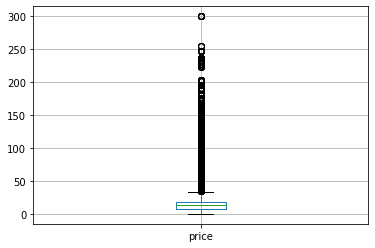

In [33]:
# Boxplot sur les prix par rapport aux ventes réalisées
new_data[['price']].boxplot()

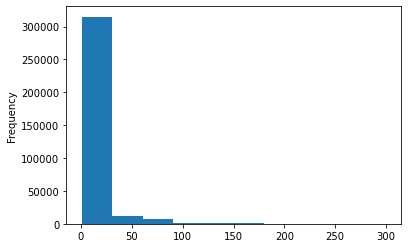

In [34]:
# Histogramme de la répartition des prix des différents livres
histogram = new_data['price'].plot.hist()
plt.show()

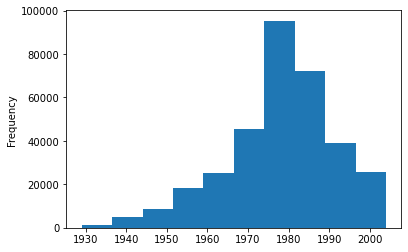

In [35]:
# Histogramme de la répartition des clients par âge
histogr = new_data['birth'].plot.hist()

plt.show()

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_2948\77220901.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  heatmap = sns.heatmap(new_data.corr(), mask=np.triu(np.ones_like(new_data.corr(), dtype=np.bool)), vmin=-1, vmax=1, annot=True, cmap='BrBG')


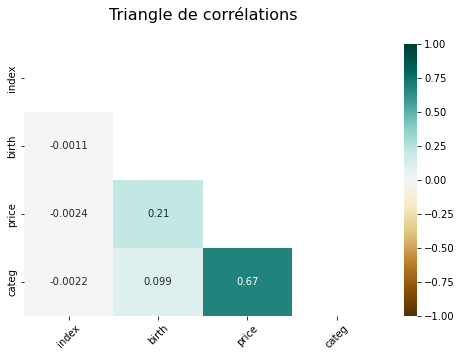

In [36]:
plt.figure(figsize=(8, 5))
heatmap = sns.heatmap(new_data.corr(), mask=np.triu(np.ones_like(new_data.corr(), dtype=np.bool)), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle de corrélations', fontdict={'fontsize':16}, pad=24)
plt.xticks(rotation=45)
plt.show()

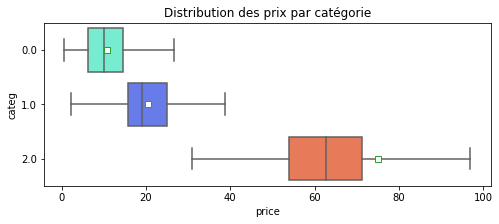

In [37]:
plt.figure(figsize=(8,3))
sns.boxplot(data=new_data, y='categ', x='price', orient='h', showfliers=False, showmeans=True, palette=["#64ffda", "#536dfe", "#ff6e40"], meanprops={"marker":"s","markerfacecolor":"white"})
plt.title('Distribution des prix par catégorie')
plt.show()

In [38]:
print('Catégorie 0 :',
    '\n- Prix moyen :', round(new_data[new_data['categ']==0]['price'].mean(), 2), 
    '\n- Prix médian :', new_data[new_data['categ']==0]['price'].median(), 
    '\n- Mode :', new_data[new_data['categ']==0]['price'].mode().values[0])

Catégorie 0 : 
- Prix moyen : 10.65 
- Prix médian : 9.99 
- Mode : 4.99


In [39]:
print('Catégorie 1 :',
    '\n- Prix moyen :', round(new_data[new_data['categ']==1]['price'].mean(), 2), 
    '\n- Prix médian :', new_data[new_data['categ']==1]['price'].median(), 
    '\n- Mode :', new_data[new_data['categ']==1]['price'].mode().values[0])

Catégorie 1 : 
- Prix moyen : 20.48 
- Prix médian : 19.08 
- Mode : 15.99


In [40]:
print('Catégorie 2 :',
    '\n- Prix moyen :', round(new_data[new_data['categ']==2]['price'].mean(), 2), 
    '\n- Prix médian :', new_data[new_data['categ']==2]['price'].median(), 
    '\n- Mode :', new_data[new_data['categ']==2]['price'].mode().values[0])

Catégorie 2 : 
- Prix moyen : 75.17 
- Prix médian : 62.83 
- Mode : 68.99


In [41]:
# Courbe de Lorenz
depenses = new_data[new_data['price'] < 0]
dep = -depenses['price'].values
n = len(dep)
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz)
xaxis = np.linspace(0-1/n,1+1/n,n+1) 
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.show()

ZeroDivisionError: division by zero

In [42]:
# conversion de la variable date en datetime
new_data['date'] = pd.to_datetime(new_data['date'], format='%Y-%m-%d')
new_data['date'].values

array(['2021-04-10T18:37:28.723910000', '2022-02-03T01:55:53.276402000',
       '2021-09-23T15:13:46.938559000', ...,
       '2021-03-16T17:31:59.442007000', '2021-10-30T16:50:15.997750000',
       '2021-06-26T14:38:19.732946000'], dtype='datetime64[ns]')

In [43]:
# Dates de transaction la plus ancienne et la plus récente
print('Transactions du', str(new_data['date'].min())[:10], 'au', str(new_data['date'].max())[:10])

Transactions du 2021-03-01 au 2022-02-28


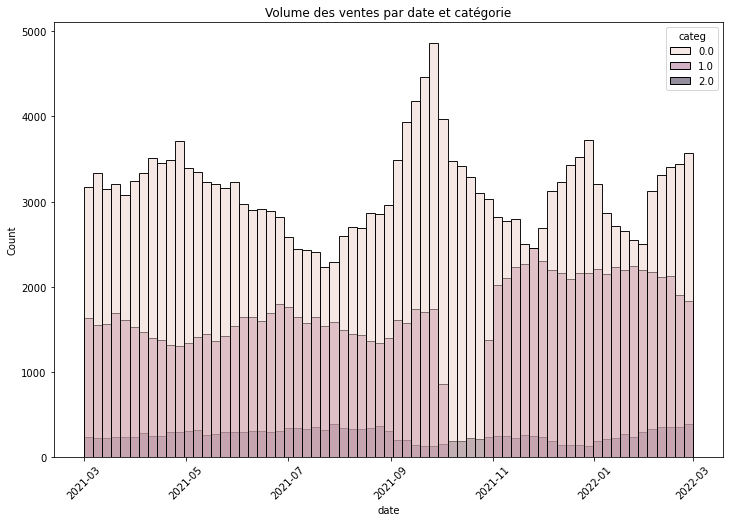

In [44]:
# Séries temporelles - volume des ventes par date et catégorie
plt.figure(figsize=(12,8))
sns.histplot(data=new_data, x='date', hue='categ')
plt.xticks(rotation=45)
plt.title('Volume des ventes par date et catégorie')
plt.show()

In [ ]:
# Mission 3 -
# corrélation entre le sexe et catégories produits achetés ?
# corrélation âge client et montant total des achats ?
# fréquence d'achat ?
# taille du panier moyen ?
# catégories de produits achetés ?

In [45]:
men_o = new_data.loc[(new_data["sex"]=="m") & (new_data["categ"]==0.0)]
men_o

,index,id_prod,date,session_id,client_id,sex,birth,price,categ
3,3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,m,1963,4.20,0.0
11,11,0_1613,2021-06-11 18:01:45.863768,s_47281,c_220,m,1960,8.99,0.0
12,12,0_1368,2021-10-02 10:50:43.188179,s_98886,c_857,m,1985,5.13,0.0
14,14,0_1207,2021-10-12 23:22:51.290635,s_103927,c_648,m,1976,16.99,0.0
21,21,0_336,2021-07-10 04:48:50.708782,s_60294,c_3561,m,1991,3.23,0.0
...,...,...,...,...,...,...,...,...,...
336798,336872,0_1596,2021-03-22 04:31:42.170467,s_9750,c_4147,m,1980,10.36,0.0
336803,336877,0_1381,2021-03-08 23:47:09.661751,s_3682,c_8605,m,1979,5.99,0.0
336804,336878,0_1480,2021-03-28 01:40:24.785448,s_12413,c_6259,m,1991,4.15,0.0
336809,336883,0_1475,2021-07-22 13:47:39.400914,s_65686,c_5607,m,1950,11.99,0.0


In [46]:
men_o = men_o.groupby(by = ['categ']).size().reset_index(name = 'sex')
men_o

,categ,sex
0,0.0,105640


In [47]:
men_one = new_data.loc[(new_data["sex"]=="m") & (new_data["categ"]==1.0)]
men_one

,index,id_prod,date,session_id,client_id,sex,birth,price,categ
20,20,1_333,2021-12-17 06:22:03.132127,s_135611,c_615,m,1970,15.99,1.0
23,23,1_644,2021-05-29 06:55:31.348787,s_41069,c_6781,m,1966,25.79,1.0
24,24,1_274,2022-02-09 04:57:29.344848,s_162284,c_4306,m,1964,24.40,1.0
32,32,1_109,2021-12-03 09:19:11.507019,s_128731,c_6819,m,1980,22.99,1.0
33,33,1_622,2021-12-28 02:56:00.200349,s_141121,c_2220,m,1990,17.41,1.0
...,...,...,...,...,...,...,...,...,...
336799,336873,1_505,2021-04-18 20:44:09.077431,s_22452,c_91,m,1971,16.99,1.0
336801,336875,1_379,2021-11-13 07:55:16.437794,s_118934,c_1061,m,1991,26.99,1.0
336802,336876,1_445,2021-11-24 16:28:40.455768,s_124454,c_5592,m,1989,23.99,1.0
336808,336882,1_413,2022-01-10 13:47:23.973957,s_147795,c_3706,m,1987,17.99,1.0


In [48]:
men_one = men_one.groupby(by = ['categ']).size().reset_index(name = 'sex')
men_one

,categ,sex
0,1.0,54266


In [49]:
men_two = new_data.loc[(new_data["sex"]=="m") & (new_data["categ"]==2.0)]
men_two

,index,id_prod,date,session_id,client_id,sex,birth,price,categ
27,27,2_135,2021-05-26 01:46:59.530702,s_39581,c_5192,m,1965,68.99,2.0
73,73,2_208,2021-08-21 21:58:40.983725,s_78917,c_7881,m,1996,54.87,2.0
147,147,2_19,2021-05-07 13:32:04.703604,s_31172,c_6884,m,1994,69.99,2.0
163,163,2_227,2021-10-22 17:41:17.347164,s_108583,c_5841,m,1996,50.99,2.0
191,191,2_96,2021-07-28 08:07:22.427438,s_68149,c_8576,m,1998,47.91,2.0
...,...,...,...,...,...,...,...,...,...
336603,336677,2_46,2021-06-10 02:06:15.939216,s_46500,c_5927,m,1995,41.31,2.0
336625,336699,2_39,2021-06-18 15:00:04.779935,s_50388,c_4653,m,1993,57.99,2.0
336730,336804,2_46,2021-09-15 21:45:35.710412,s_90471,c_6458,m,2004,41.31,2.0
336795,336869,2_224,2021-06-18 10:49:10.960641,s_50302,c_4958,m,1999,87.40,2.0


In [50]:
men_two = men_two.groupby(by = ['categ']).size().reset_index(name = 'sex')
men_two

,categ,sex
0,2.0,9292


In [51]:
men = men_two.append(men_one)
men

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_2948\2183975836.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  men = men_two.append(men_one)


,categ,sex
0,2.0,9292
0,1.0,54266


In [52]:
men = men.append(men_o)
men

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_2948\3507095662.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  men = men.append(men_o)


,categ,sex
0,2.0,9292
0,1.0,54266
0,0.0,105640


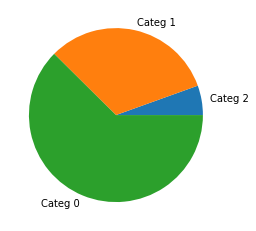

In [70]:
x = np.array([9292, 54266, 105640])
label = ["Categ 2", "Categ 1", "Categ 0"]

plt.pie(x, labels=label)
plt.show()

In [54]:
fem_o = new_data.loc[(new_data["sex"]=="f") & (new_data["categ"]==0.0)]
fem_o

,index,id_prod,date,session_id,client_id,sex,birth,price,categ
0,0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,f,1977,4.99,0.0
4,4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,f,1980,8.99,0.0
5,5,0_1085,2021-09-15 05:47:48.215162,s_90139,c_2526,f,1982,3.99,0.0
6,6,0_1508,2021-08-29 05:39:01.055455,s_82100,c_5799,f,1962,8.03,0.0
7,7,0_1627,2021-09-19 14:54:52.410362,s_92294,c_1422,f,1980,3.99,0.0
...,...,...,...,...,...,...,...,...,...
336794,336868,0_1691,2021-12-11 18:49:26.204219,s_132902,c_5581,f,1956,14.99,0.0
336805,336879,0_2098,2021-04-21 18:52:32.218210,s_23778,c_6990,f,1986,14.37,0.0
336806,336880,0_153,2021-10-17 12:47:22.803642,s_106129,c_682,f,1974,3.99,0.0
336813,336887,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137,f,1968,11.03,0.0


In [55]:
fem_o = fem_o.groupby(by = ['categ']).size().reset_index(name = 'sex')
fem_o

,categ,sex
0,0.0,103786


In [56]:
fem_one = new_data.loc[(new_data["sex"]=="f") & (new_data["categ"]==1.0)]
fem_one

,index,id_prod,date,session_id,client_id,sex,birth,price,categ
2,2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,f,1979,10.71,1.0
15,15,1_281,2022-02-10 09:56:32.868016,s_162888,c_7099,f,1971,23.99,1.0
16,16,1_285,2021-11-15 11:32:23.000489,s_119978,c_611,f,1987,14.99,1.0
29,29,1_333,2021-08-09 20:27:58.329230,s_73560,c_6706,f,1945,15.99,1.0
30,30,1_348,2021-11-10 22:00:16.549071,s_117707,c_2954,f,1970,16.15,1.0
...,...,...,...,...,...,...,...,...,...
336788,336862,1_493,2021-04-23 17:11:34.580572,s_24686,c_3366,f,1938,10.99,1.0
336789,336863,1_729,2022-02-23 12:56:23.881386,s_169644,c_14,f,1971,31.99,1.0
336797,336871,1_170,2021-11-12 17:28:12.431649,s_118601,c_7386,f,1978,14.22,1.0
336807,336881,1_282,2021-06-01 12:14:28.924898,s_42561,c_2945,f,1968,23.20,1.0


In [57]:
fem_one = fem_one.groupby(by = ['categ']).size().reset_index(name = 'sex')
fem_one

,categ,sex
0,1.0,55469


In [58]:
fem_two = new_data.loc[(new_data["sex"]=="f") & (new_data["categ"]==2.0)]
fem_two

,index,id_prod,date,session_id,client_id,sex,birth,price,categ
1,1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,f,2000,65.75,2.0
111,111,2_139,2022-01-16 13:39:40.278930,s_150675,c_8517,f,2000,82.99,2.0
132,132,2_62,2021-08-28 05:50:46.906391,s_81697,c_7806,f,1994,60.96,2.0
150,150,2_112,2021-06-10 18:55:23.078433,s_46832,c_4924,f,1953,67.57,2.0
183,183,2_140,2021-08-12 07:18:22.223225,s_74649,c_262,f,2004,42.48,2.0
...,...,...,...,...,...,...,...,...,...
336649,336723,2_152,2021-05-07 13:20:31.359171,s_31166,c_1516,f,2004,34.23,2.0
336658,336732,2_160,2021-04-03 20:56:24.950063,s_15576,c_7011,f,1996,62.83,2.0
336676,336750,2_208,2021-08-01 16:13:45.052960,s_70014,c_3158,f,1998,54.87,2.0
336679,336753,2_185,2022-02-20 20:57:29.169089,s_168298,c_139,f,1998,43.99,2.0


In [59]:
fem_two = fem_two.groupby(by = ['categ']).size().reset_index(name = 'sex')
fem_two

,categ,sex
0,2.0,8260


In [60]:
fem = fem_two.append(fem_one)
fem

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_2948\1608658740.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fem = fem_two.append(fem_one)


,categ,sex
0,2.0,8260
0,1.0,55469


In [61]:
fem = fem.append(fem_o)
fem

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_2948\3803115866.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fem = fem.append(fem_o)


,categ,sex
0,2.0,8260
0,1.0,55469
0,0.0,103786


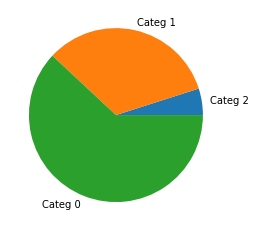

In [69]:
x = np.array([8260, 55469, 103786])
label = ["Categ 2", "Categ 1", "Categ 0"]

plt.pie(x, labels=label)
plt.show()

In [ ]:
# il ne semble pas y avoir de corrélation possible entre l'âge
# et la catégories des produits
# les deux échantillons se tournent vers la categ 0